In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

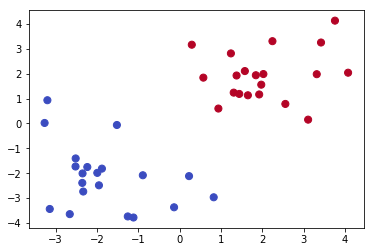

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

In [3]:
# your code here
from sklearn import svm
clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1]) 
w = clf.coef_[0]
a = -w[0] / w[1]
c = (clf.intercept_[0]) / w[1]
x1 = np.linspace(-3.5, 4.5)
x2 = a * x1 - c
print("The Seperating Hyperplane is: x2 = {}*x1 - {}.".format(a, c))

The Seperating Hyperplane is: x2 = -1.17689316087*x1 - 0.0766504186458.


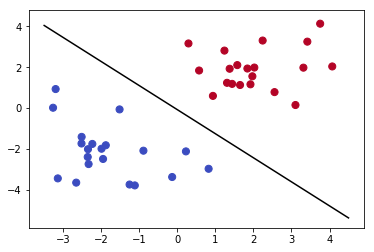

In [5]:
# plotting the hyperplane 
plt.gca()
plt.plot(x1, x2, 'k-')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### b. List the support vectors.

In [6]:
clf.support_vectors_

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

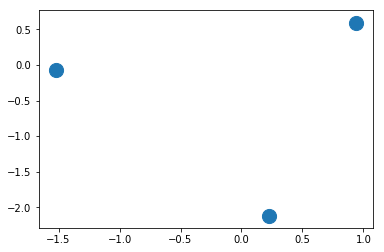

In [7]:
# plotting the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200)
plt.show()

#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

In [8]:
b = clf.support_vectors_[0]
d = (b[1] - a * b[0])
x2_down = a * x1 + d

b = clf.support_vectors_[-1]
u = (b[1] - a * b[0])
x2_up = a * x1 + u

print("The upper marhin is: x2 = {}*x1{}.".format(a, d))
print("the lower margin is: x2 = {}*x1+{}.".format(a, u))

The upper marhin is: x2 = -1.17689316087*x1-1.8518077187.
the lower margin is: x2 = -1.17689316087*x1+1.69809110446.


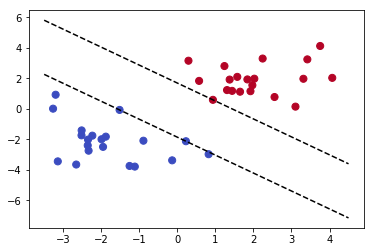

In [9]:
# plotting the support vetors with margin lines
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### d. Compute the width of the margin.

In [10]:
# calculating the angle between the margin line and the horizontal axis
import numpy as np
angle = np.arctan(a)

In [11]:
# the distance between two intercepts of the upper and lower line
dis_int = np.abs(d-u)

In [12]:
# distance between upper and lower margins
distance = dis_int*np.cos(angle)
print("the distance between upper and lower margins is: {}".format(distance))

the distance between upper and lower margins is: 2.29860700795


#### e. What would you expect to happen to the margin if the constant C was made very small?

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.

*The distance between two margin boundaries will be very small. They may even converge. 

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

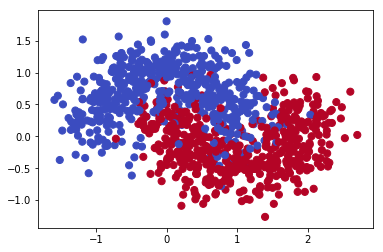

In [13]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [14]:
# your code here
clf = svm.SVC(kernel='poly') 
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
# in sample accuracy
print "In sample, we successfully predict {} percent of the data".format(100-abs(clf.predict(X_train)-Y_train).sum()*50/len(Y_train))

In sample, we successfully predict 91 percent of the data


In [16]:
# out of sample accuracy
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

print "Out of sample, we successfully predict {} percent of the data".format((correct)*100)

Out of sample, we successfully predict 82.7272727273 percent of the data


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


In [17]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

In [18]:
import math
OS_LIST = [[1], [2], [3], [4]]
for i in range(1, 5):
    OS = []
    C = [math.exp(j) for j in np.linspace(-10,2*i,200)]
    for c in C:
        clf2 = svm.SVC(kernel='poly', degree = i, C = c) 
        clf2.fit(X_train_1, Y_train_1)
        correct=1.0*(clf2.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS.append(correct)
    OS_LIST[i-1] = OS

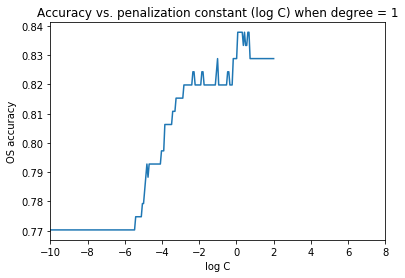

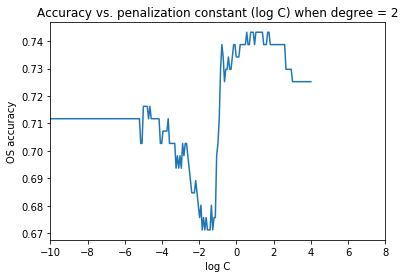

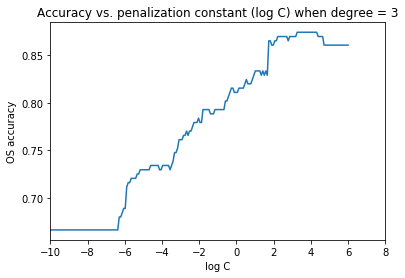

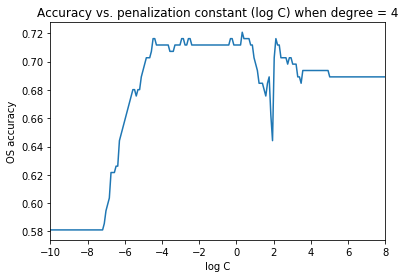

In [19]:
# Plot the graph of "Accuracy vs log(C)" for each degree
for i in range(0,4):
    plt.gca()
    plt.plot([j for j in np.linspace(-10,2*(i+1),200)],OS_LIST[i])
    plt.xlabel("log C")
    plt.ylabel("OS accuracy")
    plt.title("Accuracy vs. penalization constant (log C) when degree = {}".format(i+1))
    plt.xlim(-10,8)
    plt.show()

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [20]:
# your code here
# Judging from the graphs above, when degree = 3 and log(C) = 3 we have the highest accuracy. 
clf_final = svm.SVC(kernel='poly', degree = 3, C = math.exp(3)) 
clf_final.fit(X_train, Y_train)
correct=1.0*(clf_final.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

print "Out of sample, we successfully predict {} percent of the data".format((correct)*100)

Out of sample, we successfully predict 88.7878787879 percent of the data


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes)

P(No)

P(Red|Yes)

P(SUV|Yes)

P(Domestic|Yes)

P(Red|No)

P(SUV|No)

P(Domestic|No)

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen?

In [21]:
#b)
import pandas as pd
Prob = pd.DataFrame(index = range(1,3), columns=['Class', 'color=red', 'origin=domestic',
                                'type=SUV', 'Total Likelihood', 'Prior', 'Unnormalized posterior', 'Posterior'])
Prob.fillna(0)

,Class,color=red,origin=domestic,type=SUV,Total Likelihood,Prior,Unnormalized posterior,Posterior
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0


In [22]:
#a) Calculating sample probabilities
P_YES = 6.0/10.0
P_NO = 4.0/10.0
P_RED_YES= (5.0/10.0)/(6.0/10.0)
P_SUV_YES = (2.0/10.0)/(6.0/10.0)
P_DOME_YES = (3.0/10.0)/(6.0/10.0)
P_RED_NO = (1.0/10.0)/(4.0/10.0)
P_SUV_NO = (3.0/10.0)/(4.0/10.0)
P_DOME_NO = (2.0/10.0)/(4.0/10.0)

print("P(Yes) = {}".format(P_YES))
print("P(No) = {}".format(P_NO))
print("P(Red|Yes) = {}".format(P_RED_YES))
print("P(SUV|Yes) = {}".format(P_SUV_YES))
print("P(Domestic|Yes) = {}".format(P_DOME_YES))
print("P(Red|No) = {}".format(P_RED_NO))
print("P(SUV|No) = {}".format(P_SUV_NO))
print("P(Domestic|No) = {}".format(P_DOME_NO))

P(Yes) = 0.6
P(No) = 0.4
P(Red|Yes) = 0.833333333333
P(SUV|Yes) = 0.333333333333
P(Domestic|Yes) = 0.5
P(Red|No) = 0.25
P(SUV|No) = 0.75
P(Domestic|No) = 0.5


In [23]:
#b)
Prob.iloc[0, 0] = 'Yes'
Prob.iloc[1, 0] = 'No'
Prob['color=red'] = [P_RED_YES, P_RED_NO]
Prob['origin=domestic']=[P_DOME_YES, P_DOME_NO]
Prob['type=SUV'] = [P_SUV_YES, P_SUV_NO]
Prob['Prior'] = [P_YES, P_NO]
Prob

,Class,color=red,origin=domestic,type=SUV,Total Likelihood,Prior,Unnormalized posterior,Posterior
1,Yes,0.833333,0.5,0.333333,NaN,0.6,NaN,NaN
2,No,0.250000,0.5,0.750000,NaN,0.4,NaN,NaN


In [24]:
# computing total likelihood
Prob['Total Likelihood'][1] = Prob['color=red'][1] * Prob['origin=domestic'][1] * Prob['type=SUV'][1]
Prob['Total Likelihood'][2] = Prob['color=red'][2] * Prob['origin=domestic'][2] * Prob['type=SUV'][2]
Prob

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ana\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Class,color=red,origin=domestic,type=SUV,Total Likelihood,Prior,Unnormalized posterior,Posterior
1,Yes,0.833333,0.5,0.333333,0.138889,0.6,NaN,NaN
2,No,0.250000,0.5,0.750000,0.09375,0.4,NaN,NaN


In [25]:
# Computing Unormalized Posterior
Prob['Unnormalized posterior'][1] = Prob['Prior'][1]*Prob['Total Likelihood'][1]
Prob['Unnormalized posterior'][2] = Prob['Prior'][2]*Prob['Total Likelihood'][2]
Prob

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ana\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Class,color=red,origin=domestic,type=SUV,Total Likelihood,Prior,Unnormalized posterior,Posterior
1,Yes,0.833333,0.5,0.333333,0.138889,0.6,0.0833333,NaN
2,No,0.250000,0.5,0.750000,0.09375,0.4,0.0375,NaN


In [26]:
# Calculating Posterior
SUM  = Prob['Unnormalized posterior'][2] + Prob['Unnormalized posterior'][1]
Prob['Posterior'][1] =  Prob['Unnormalized posterior'][1]/SUM
Prob['Posterior'][2] =  Prob['Unnormalized posterior'][2]/SUM
Prob

D:\ana\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ana\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Class,color=red,origin=domestic,type=SUV,Total Likelihood,Prior,Unnormalized posterior,Posterior
1,Yes,0.833333,0.5,0.333333,0.138889,0.6,0.0833333,0.689655
2,No,0.250000,0.5,0.750000,0.09375,0.4,0.0375,0.310345


In [27]:
print("the probability that a red, domestic SUV will be stolen is: {}".format(Prob['Posterior'][1]))

the probability that a red, domestic SUV will be stolen is: 0.689655172414


## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [4]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print X_train.head()

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [5]:
# your code here
from scipy import stats
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [6]:
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print 'In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train)
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test)

In sample prediction accuracy: 0.758474576271
Out of sample prediction accuracy: 0.791139240506


### b) What is the prior probability of diabetes, learned from the training data?

In [8]:
# your code here
print("prior probability of non diabetes: {}".format(trained_model.class_prior_[0]))
print("prior probability of diabetes: {}".format(trained_model.class_prior_[1]))

prior probability of non diabetes: 0.699152542373
prior probability of diabetes: 0.300847457627


### c) What is the mean and variance of each input variable for patients with diabetes?

In [32]:
#mean of each feature with class 1
for i in range(len(data_train.columns)-2):
    print("mean of {}: {}".format(data_train.columns[i+2], trained_model.theta_[1][i]))

mean of t_pre: 4.07042253521
mean of glu: 144.14084507
mean of blood_p: 74.5633802817
mean of triceps: 33.4788732394
mean of serum: 209.211267606
mean of b_m: 35.223943662
mean of pedigree_f: 0.639042253521
mean of age: 35.7887323944


In [33]:
#variance of each feature with class 1
for i in range(len(data_train.columns)-2):
    print("variance of {}: {}".format(data_train.columns[i+2], trained_model.sigma_[1][i]))

variance of t_pre: 12.2063202879
variance of glu: 924.768907076
variance of blood_p: 187.738952702
variance of triceps: 93.9678755349
variance of serum: 15882.0539696
variance of b_m: 38.6170443506
variance of pedigree_f: 0.190055013934
variance of age: 103.856786465


### d) What is the mean and variance of each input variable for patients without diabetes?

In [34]:
#mean of each feature with class 1
for i in range(len(data_train.columns)-2):
    print("mean of {}: {}".format(data_train.columns[i+2], trained_model.theta_[0][i]))

mean of t_pre: 2.69090909091
mean of glu: 111.466666667
mean of blood_p: 69.2060606061
mean of triceps: 27.2
mean of serum: 127.006060606
mean of b_m: 31.7090909091
mean of pedigree_f: 0.468684848485
mean of age: 28.3939393939


In [35]:
#variance of each feature with class 0
for i in range(len(data_train.columns)-2):
    print("variance of {}: {}".format(data_train.columns[i+2], trained_model.sigma_[0][i]))

variance of t_pre: 6.7711414923
variance of glu: 605.99435545
variance of blood_p: 136.369672254
variance of triceps: 108.269102925
variance of serum: 8318.98785407
variance of b_m: 39.9219293711
variance of pedigree_f: 0.0846144012471
variance of age: 72.4448237696


## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [36]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print X_Labeled_train
print y_Labeled_train

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6
0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [40]:
# your code here
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [41]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)
for i,j in naive_bayes_classifier.items():
    print i
    print j
    print
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test)

2_0
6    0.6
4    0.2
2    0.2
Name: 2, dtype: float64

2_1
2    0.50
6    0.25
1    0.25
Name: 2, dtype: float64

prior
0.444444444444

1_1
2    0.50
3    0.25
1    0.25
Name: 1, dtype: float64

1_0
6    0.6
4    0.2
1    0.2
Name: 1, dtype: float64

0_0
6    0.4
4    0.2
3    0.2
2    0.2
Name: 0, dtype: float64

0_1
1    0.50
5    0.25
2    0.25
Name: 0, dtype: float64

Out of sample prediction accuracy: 0.694444444444


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [53]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print 'Iteration',t,'of',num_iters
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled]).reset_index(drop=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled]).reset_index(drop=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [54]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)
for i,j in naive_bayes_classifier.items():
    print i
    print j
    print
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test)

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
2_0
{1: 0.00025354452050004917, 2: 0.084939080833025996, 3: